In [1]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\kaizi\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
len(X), len(y)

(70000, 70000)

In [5]:
first_digit_is_5 = X[0]

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [7]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))

In [8]:
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [9]:
ovr_clf.predict([first_digit_is_5])

array(['5'], dtype='<U1')

In [10]:
cross_val_score(ovr_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.97685, 0.9738 , 0.97495])

In [11]:
y_train_pred = cross_val_predict(ovr_clf, X_train, y_train, cv=3)

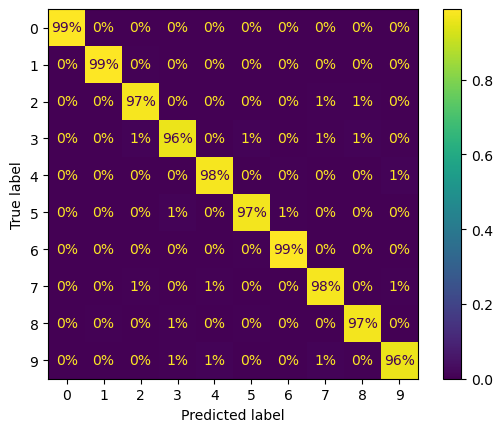

In [12]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

In [14]:
plt.show()

In [15]:
first_digit_is_5_score = ovr_clf.decision_function([first_digit_is_5])

In [16]:
first_digit_is_5_score.round(2)

array([[-1.33, -1.79, -1.39, -0.94, -2.29,  0.81, -1.72, -1.21, -1.64,
        -1.79]])